In [1]:
%run common_init.py

Start import
Host: DESKTOP-URE1BBI.localdomain
Setting tmp folder to /tmp/
calculating effective efficiency for Xe detector done
calculating effective efficiency for Ge detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Xe_migd detector done
calculating effective efficiency for Ge_migd detector done
calculating effective efficiency for Ar_migd detector done
Done import
SYSTEM
	Running on linux
	Python version 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
	Python installation /home/joran/miniconda3/envs/dddm3/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



In [2]:
save_dir = '/home/joran/google_drive/200202_results_dddm'

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

02 Jan. 2020


## HALO model ##
In DirectDmTargets (dddm) we have two ways of generating spectra:
 - Directly from wimprates. See: <https://github.com/jorana/wimprates> (cloned from  <https://github.com/JelleAalbers/wimprates>) 
 - Loading velocity distributions from verne into wimprates to generate a spectrum of dark matter by integrating the velocity distribution with wimprates <https://github.com/jorana/verne> (cloned from <https://github.com/bradkav/verne>)


In [44]:
plt.rcParams['axes.grid'] = True

In [45]:
def n_int_f(f,v):
    '''numerically calculate the integral of f*v*dv'''
    bin_widths = v[1:]-v[:-1]
    av_bin_width = np.mean(bin_widths)
    assert np.all(abs(bin_widths-av_bin_width) -1 < 0.01), "use equal bin-spacing"
    return np.sum(f * v * bin_widths[0])

Num. int. of SHM=	1.0
looking for sig_-35.0_mx_0.00_avg in ['sig_-22.0_mx_0.00_avg.csv', 'sig_-29.0_mx_0.00_avg.csv', 'sig_-29.5_mx_0.00_avg.csv', 'sig_-30.0_mx_0.00_avg.csv', 'sig_-30.5_mx_0.00_avg.csv', 'sig_-31.0_mx_0.00_avg.csv', 'sig_-31.5_mx_0.00_avg.csv', 'sig_-32.0_mx_0.00_avg.csv', 'sig_-32.5_mx_0.00_avg.csv', 'sig_-33.0_mx_0.00_avg.csv', 'sig_-33.2_mx_0.00_avg.csv', 'sig_-33.5_mx_0.00_avg.csv', 'sig_-33.6_mx_0.00_avg.csv', 'sig_-34.0_mx_0.00_avg.csv', 'sig_-34.1_mx_0.00_avg.csv', 'sig_-34.5_mx_0.00_avg.csv', 'sig_-35.0_mx_0.00_avg.csv', 'sig_-35.5_mx_0.00_avg.csv', 'sig_-36.0_mx_0.00_avg.csv', 'sig_-37.0_mx_0.00_avg.csv', 'sig_-38.0_mx_0.00_avg.csv', 'sig_-39.0_mx_0.00_avg.csv', 'sig_-40.0_mx_0.00_avg.csv']
sig_-35.0_mx_0.00_avg is not in  sig_-22.0_mx_0.00_avg.csv
sig_-35.0_mx_0.00_avg is not in  sig_-29.0_mx_0.00_avg.csv
sig_-35.0_mx_0.00_avg is not in  sig_-29.5_mx_0.00_avg.csv
sig_-35.0_mx_0.00_avg is not in  sig_-30.0_mx_0.00_avg.csv
sig_-35.0_mx_0.00_avg is not in  sig_

/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/halo.py:144: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


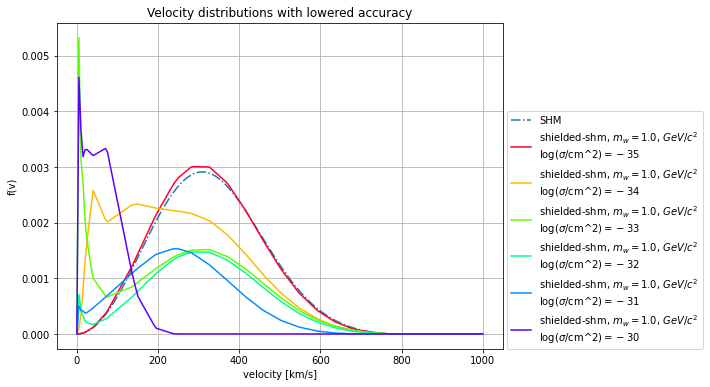

In [46]:
# Plot -options
plt.figure(figsize = (8,6))
nplots = 7
cm = plt.get_cmap('gist_rainbow')

# velocity
vel = np.linspace(0,1000,200)

# load standard-halo-model spectrum with given parameters
args = dict(v_0=230* nu.km / nu.s, v_esc = 544* nu.km / nu.s, rho_dm = 0.3 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
shm_dist = dddm.SHM(**args)
f = shm_dist.velocity_dist(vel*nu.km/nu.s, 0) * nu.km/nu.s
plt.plot(vel, f, label = 'SHM', linestyle = '-.')
int_shm = n_int_f(f,vel)
print(f'Num. int. of {"SHM"}=\t{int_shm/int_shm}')

# Make the mass and the location explicit
log_mw = 0
loc = "XENON"
s_min, s_max, d_s = -35, -29, 1 # plot: from - to - with steps
nplots = nplots = (s_max - s_min)  // d_s
# loop over cross-sections
for i, sig in enumerate(np.arange(s_min, s_max, d_s)):
    args['log_cross_section'] = sig
    args['log_mass'] = log_mw
    args['location'] = loc
    verne_dist = dddm.VerneSHM(**args)
    f = verne_dist.velocity_dist(vel*nu.km/nu.s, 0)*nu.km/nu.s
    plt.plot(vel, f, 
             c = cm(float(i)/nplots),
             label = f'shielded-shm, $m_w=%.1f$, $GeV/c^2$\n$\log(\sigma/$cm^2$) = {sig}$'%(10**log_mw))
    print(f'Num. int. of {sig}=\t{n_int_f(f,vel)/int_shm}')
plt.legend(loc=(1.01,0))
plt.xlabel('velocity [km/s]')
plt.ylabel('f(v)')
plt.title('Velocity distributions with lowered accuracy')
for f_type in ['pdf', 'png']:
    plt.savefig(f'{save_dir}/quick_verne.{f_type}', dpi = 100, bbox_inches= 'tight')

# Load the full verne simulation
below we load the full verne simulation with the default options, this takes somewhat longer than the procedure as on the forked verne code as linked above.

In [47]:
# Command to load
save = "/mnt/c/Users/Joran/dddm_data/verne/full_spec.csv" 
if not os.path.exists(save):
    !python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist_full.py -m_x 1 -sigma_p 1e-34 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 229.99999999999997 -v_esc 544.0 -save_as $save

In [48]:
# A copy of the full spectrum has been saved at:
df = pd.read_csv('/home/joran/google_drive/windows-anaconda/verne/results/full_veldists/f_all_XENON_229_544_-78.3_1.00.csv')

# The df contains several values of the angle gamma, disentangle those here:
_,x,y  = df.keys()
headers = np.unique(df['gamma/pi'].values)
def get_average(df, headers, projection):
    masks = np.array([df['gamma/pi'] == header for header in headers])
    combined = np.array([df[mask][projection].values for mask in masks])
    return np.average(combined,axis = 0)
df_average = pd.DataFrame()
for projection in [x,y]:
    df_average[projection] = get_average(df, headers, projection)

# The different angles
headers = np.unique(df['gamma/pi'].values)
n_headers = len(headers)

### plot verne
below we plot the full verne calculation and compare it with the calculation as performed by the forked github branch as linked above

/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/halo.py:144: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


looking for sig_-34.0_mx_0.00_avg in ['sig_-22.0_mx_0.00_avg.csv', 'sig_-29.0_mx_0.00_avg.csv', 'sig_-29.5_mx_0.00_avg.csv', 'sig_-30.0_mx_0.00_avg.csv', 'sig_-30.5_mx_0.00_avg.csv', 'sig_-31.0_mx_0.00_avg.csv', 'sig_-31.5_mx_0.00_avg.csv', 'sig_-32.0_mx_0.00_avg.csv', 'sig_-32.5_mx_0.00_avg.csv', 'sig_-33.0_mx_0.00_avg.csv', 'sig_-33.2_mx_0.00_avg.csv', 'sig_-33.5_mx_0.00_avg.csv', 'sig_-33.6_mx_0.00_avg.csv', 'sig_-34.0_mx_0.00_avg.csv', 'sig_-34.1_mx_0.00_avg.csv', 'sig_-34.5_mx_0.00_avg.csv', 'sig_-35.0_mx_0.00_avg.csv', 'sig_-35.5_mx_0.00_avg.csv', 'sig_-36.0_mx_0.00_avg.csv', 'sig_-37.0_mx_0.00_avg.csv', 'sig_-38.0_mx_0.00_avg.csv', 'sig_-39.0_mx_0.00_avg.csv', 'sig_-40.0_mx_0.00_avg.csv']
sig_-34.0_mx_0.00_avg is not in  sig_-22.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-29.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-29.5_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-30.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-30.5_mx_0.00_avg.csv


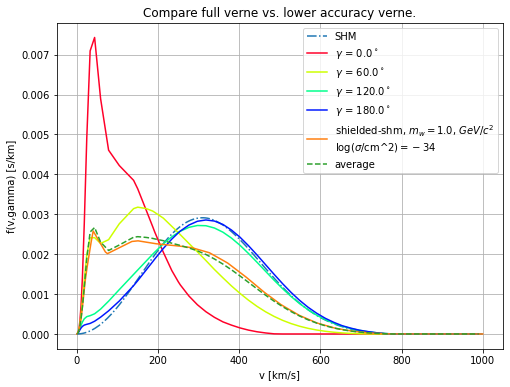

In [49]:
# Plot options
plt.figure(figsize = (8,6))
plt.xlabel("v [km/s]")

# Plot shm
plt.plot(vel, shm_dist.velocity_dist(vel*nu.km/nu.s, 0) * nu.km /nu.s, label = 'SHM', linestyle = '-.')
plt.ylim()*2

# Plot for the angles
for i, header in enumerate(headers):
    mask = df['gamma/pi'] == header
    kwargs = {'color': cm(float(i)/n_headers),
        'label': '$\gamma$ = %.1f$^\circ$'%np.rad2deg(header*np.pi)}
    plt.plot(df[mask][x], df[mask][y], **kwargs)    
    plt.ylabel(y.replace("_"," "))
    
# Again plot the corresponding distribution as done above
sig = -34
args['log_cross_section'] = sig
verne_dist = dddm.VerneSHM(**args)
f_quick = verne_dist.velocity_dist(vel*nu.km/nu.s, 0) * nu.km /nu.s
plt.plot(vel, f_quick, 
     label = f'shielded-shm, $m_w=%.1f$, $GeV/c^2$\n$\log(\sigma/$cm^2$) = {sig}$'%(10**log_mw))
quick_ratio = n_int_f(f_quick, vel)/int_shm
print(f'Num. int. at average (quick)=\t{quick_ratio}')

# Also plot the average of the full simulation
plt.plot(df_average[x],df_average[y], label = 'average', linestyle = '--')
def f_in(x0,y0, x):
        return scipy.interpolate.interp1d(x0,y0, bounds_error=False, fill_value=0)(x)
full_ratio = n_int_f(f_in(df_average[x], df_average[y], vel), vel)/int_shm
print(f'Num. int. at average (full) =\t{full_ratio}')
plt.legend()
plt.title('Compare full verne vs. lower accuracy verne.')


print(f'Quick method is off by %.1f'%(100 * (1-quick_ratio / full_ratio)) + '%')
for f_type in ['pdf', 'png']:
    plt.savefig(f'{save_dir}/compare_verne.{f_type}', dpi = 100, bbox_inches= 'tight')
    


# Plot migdal spectra

In [50]:
# No detector resolution
def plot_spectrum(data, yerr = True, color = 'blue', label = 'label', linestyle = 'none'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']) if yerr else np.zeros(len(data['counts'])),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                markersize =3,
                label = label
                )
def plot_spectrum_ax(ax, data, yerr = True, color = 'blue', label = 'label', linestyle = 'none'):
    print(np.sum(data['counts']))
    ax.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']) if yerr else np.zeros(len(data['counts'])),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                markersize =3,
                label = label
                )
def get_gal_spec(det, mw = 1, sigma = 1e-34, nbins = 10):
    events = dddm.GenSpectrum(mw, sigma, use_SHM, dddm.experiment[det])
    events.n_bins = nbins
    return events.get_data(poisson = False)

In [51]:
use_SHM = dddm.SHM()

In [52]:
def get_det_spec(det, mw = 1, sigma = 1e-34, nbins = 10, background = True, shm = use_SHM):
    events = dddm.DetectorSpectrum(mw, sigma, shm, dddm.experiment[det])
    events.n_bins = nbins
    events.add_background = background
    return events.get_data(poisson = False)

In [53]:
def plot_spectra(det, mw = 1, sigma = 1e-34, nbins = 10):
    fig, (ax1,ax2) = plt.subplots(2, figsize = (14,8), sharex = True)
    
    gal_spec = get_gal_spec(det, mw = mw, sigma = sigma, nbins = nbins)
    bg_spec = get_det_spec(det, mw = mw, sigma = sigma, nbins = nbins, background = False)
    
    ax1.set_title('spectrum log. scale')
    plot_spectrum_ax(ax1, gal_spec, color = 'red', 
                     label = f'{det} without det. parameters (gal_spec)')
    
    plot_spectrum_ax(ax1,bg_spec,color =  'black', 
                     label = f'{det} (bg_spec)')

    ax1.set_ylim(bottom=np.max([plt.ylim()[-1], (1e-10 * 10/nbins)]))
    ax1.set_yscale("log")
    
    ax2.set_title('spectrum lin. scale')
    plot_spectrum_ax(ax2, gal_spec, color = 'red', 
                     label = f'{det} without det. parameters')
    plot_spectrum_ax(ax2,bg_spec,color =  'black', 
                     label = f'{det}')
    ax2.set_ylim(0, 2 * bg_spec['counts'].max())
    for ax in [ax1,ax2]:
        ax.axvline(dddm.experiment[det]['E_thr'], label = 'energy threshold')
        ax.grid(axis="both")
        ax.set_ylabel('counts/keV')
        ax.legend()
    plt.xlabel('E [keV]')

In [54]:
args = dict(v_0=230* nu.km / nu.s, v_esc = 544* nu.km / nu.s, rho_dm = 0.3 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
use_SHM = dddm.SHM(**args)

929167807.3669363
1037133.3184347098
929167807.3669363
1037133.3184347098
CPU times: user 31min 18s, sys: 15 s, total: 31min 33s
Wall time: 31min 15s


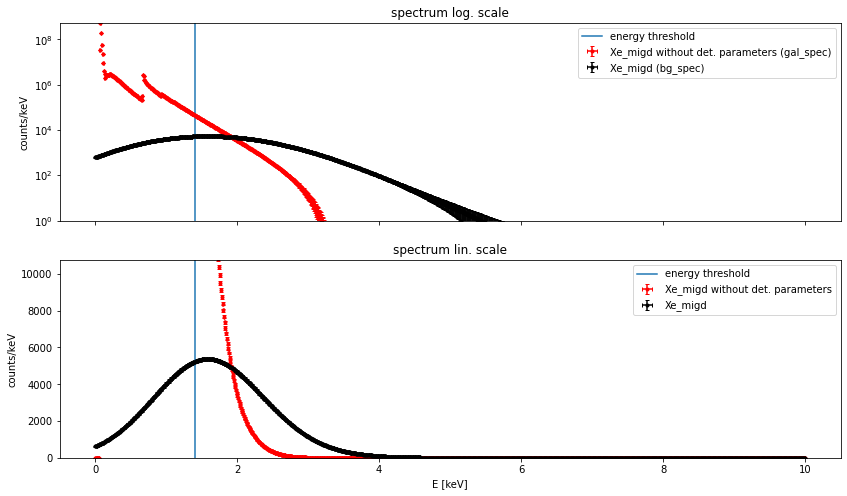

In [55]:
%%time
plot_spectra('Xe_migd', nbins = 1000)
for f_type in ['pdf', 'png']:
    plt.savefig(f'{save_dir}/shm_det.spectrum1.{f_type}', dpi = 100, bbox_inches= 'tight')

In [56]:
log_mw = 0
loc = "XENON"
sig = -34
args['log_cross_section'] = sig
args['log_mass'] = log_mw
args['location'] = loc
use_SHM = dddm.VerneSHM(**args)


looking for sig_-34.0_mx_0.00_avg in ['sig_-22.0_mx_0.00_avg.csv', 'sig_-29.0_mx_0.00_avg.csv', 'sig_-29.5_mx_0.00_avg.csv', 'sig_-30.0_mx_0.00_avg.csv', 'sig_-30.5_mx_0.00_avg.csv', 'sig_-31.0_mx_0.00_avg.csv', 'sig_-31.5_mx_0.00_avg.csv', 'sig_-32.0_mx_0.00_avg.csv', 'sig_-32.5_mx_0.00_avg.csv', 'sig_-33.0_mx_0.00_avg.csv', 'sig_-33.2_mx_0.00_avg.csv', 'sig_-33.5_mx_0.00_avg.csv', 'sig_-33.6_mx_0.00_avg.csv', 'sig_-34.0_mx_0.00_avg.csv', 'sig_-34.1_mx_0.00_avg.csv', 'sig_-34.5_mx_0.00_avg.csv', 'sig_-35.0_mx_0.00_avg.csv', 'sig_-35.5_mx_0.00_avg.csv', 'sig_-36.0_mx_0.00_avg.csv', 'sig_-37.0_mx_0.00_avg.csv', 'sig_-38.0_mx_0.00_avg.csv', 'sig_-39.0_mx_0.00_avg.csv', 'sig_-40.0_mx_0.00_avg.csv']
sig_-34.0_mx_0.00_avg is not in  sig_-22.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-29.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-29.5_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-30.0_mx_0.00_avg.csv
sig_-34.0_mx_0.00_avg is not in  sig_-30.5_mx_0.00_avg.csv


/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/scipy-1.4.1-py3.7-linux-x86_64.egg/scipy/integrate/quadpack.py:865: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)




----
finding negative rates. Doing hard override!!
----


570448587.3745894
1037133.3184347098
570448587.3745894
1037133.3184347098
CPU times: user 47min 46s, sys: 45.2 s, total: 48min 31s
Wall time: 47min 35s


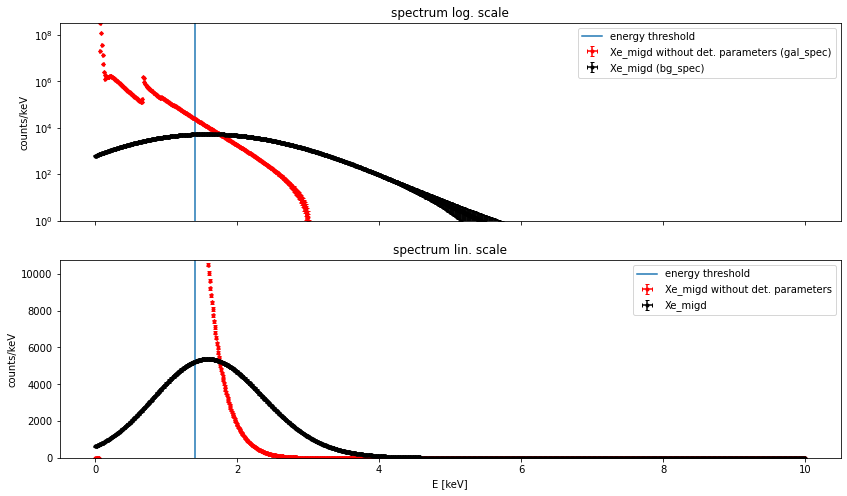

In [57]:
%%time
plot_spectra('Xe_migd', nbins = 1000)
for f_type in ['pdf', 'png']:
    plt.savefig(f'{save_dir}/verne_det.spectrum2.{f_type}', dpi = 100, bbox_inches= 'tight')

# Using dddm to get different spectra at a given variation of v0

In [58]:
def spectra_for_shm(ax, det, shm, label ="", mw = 1, sigma = 1e-34, nbins = 10, c = 'red'):
    bg_spec = get_det_spec(det, mw = mw, 
                           sigma = sigma, nbins = nbins, background = False, shm = shm)
    plot_spectrum_ax(ax1, bg_spec, color = c,
                     label = label)
    plt.xlabel('E [keV]')

25719.397075852667
162268.1529428019
521988.0034620954
1091751.8091796048
1708633.0616287754
2191938.45476153
2450393.508970148


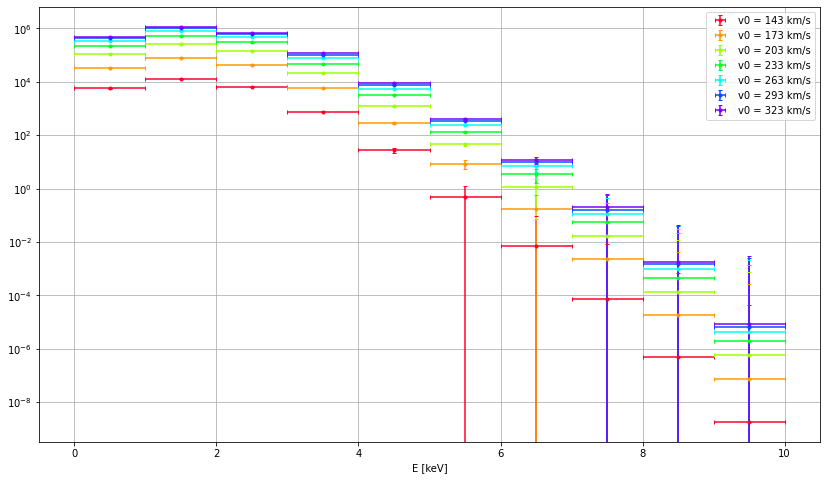

In [59]:
fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
vlist = np.arange(233-90,233+90+1, 30)
for i, v_0 in enumerate(vlist):
    args = dict(v_0=v_0* nu.km / nu.s, 
                v_esc = 544* nu.km / nu.s, 
                rho_dm = 0.3 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
    use_SHM = dddm.SHM(**args)
    spectra_for_shm(ax1, 'Xe_migd', use_SHM, nbins = 10, 
                    label = f'v0 = {v_0} km/s', c = cm(float(i)/len(vlist)) )
plt.legend()
plt.yscale("log")

359145.4953676911
572559.7234835802
796029.7486304753
1002960.9112119689
1176045.684756369
1308733.536323793
1402958.328894525


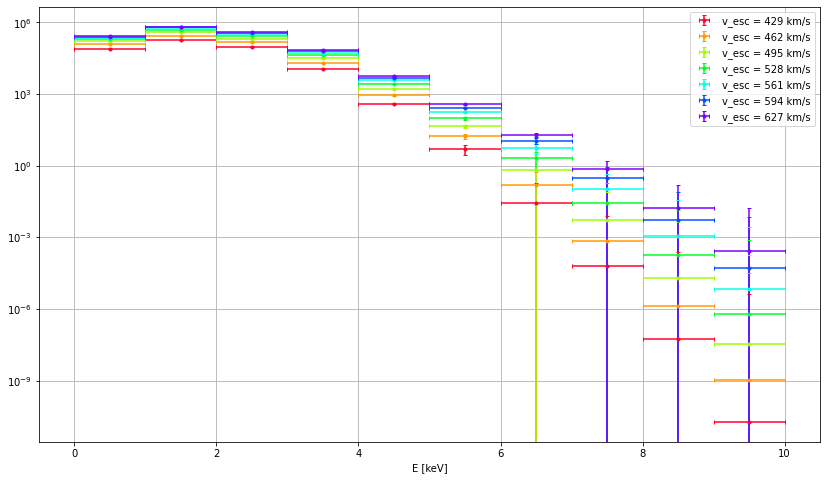

In [60]:
fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
vlist = np.arange(528-99,528+99+1, 33)
for i, v_esc in enumerate(vlist):
    args = dict(v_0=233* nu.km / nu.s, 
                v_esc = v_esc* nu.km / nu.s, 
                rho_dm = 0.3 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
    use_SHM = dddm.SHM(**args)
    spectra_for_shm(ax1, 'Xe_migd', use_SHM, nbins = 10, 
                    label = f'v_esc = {v_esc} km/s', c = cm(float(i)/len(vlist)) )
plt.legend()
plt.yscale("log")

In [61]:
path = "/mnt/c/Users/Joran/dddm_data/spectra/nbin-10/model-shm/mw-1.00/log_s--39.02/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd-HDESKTOP-URE1BBI.localdomain-P10802.csv"
# path = "/mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shm/mw-1.14/log_s--35.61/rho-0.21/v_0-142.8/v_esc-503/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd-HDESKTOP-URE1BBI.localdomain-P812.csv"
print(path)
os.path.exists(path)

/mnt/c/Users/Joran/dddm_data/spectra/nbin-10/model-shm/mw-1.00/log_s--39.02/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd-HDESKTOP-URE1BBI.localdomain-P10802.csv


True

In [62]:
read_intermediate = pd.read_csv(path)
read_intermediate

,counts,bin_centers,bin_left,bin_right
0,2.597918e+00,0.5,0.0,1.0
1,6.260148e+00,1.5,1.0,2.0
2,3.540481e+00,2.5,2.0,3.0
3,5.631928e-01,3.5,3.0,4.0
4,3.696733e-02,4.5,4.0,5.0
5,1.487267e-03,5.5,5.0,6.0
6,3.881374e-05,6.5,6.0,7.0
7,5.970113e-07,7.5,7.0,8.0
8,4.990361e-09,8.5,8.0,9.0
9,2.143227e-11,9.5,9.0,10.0


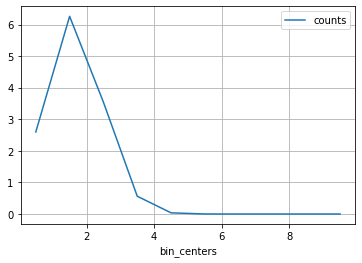

In [63]:
read_intermediate.plot('bin_centers', 'counts')

In [64]:
args = dict(v_0=233* nu.km / nu.s, 
                v_esc = 528* nu.km / nu.s, 
                rho_dm = 0.55 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
compare_shm = dddm.SHM(**args)
compare_spec = get_det_spec('Xe_migd', mw = 1, sigma = 10.**-39.02
             , nbins = 10, background = False, shm = compare_shm)

In [65]:
args = dict(v_0=233* nu.km / nu.s, 
                v_esc = 528* nu.km / nu.s, 
                rho_dm = 0.4 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
compare_shm = dddm.SHM(**args)
compare_spec2 = get_det_spec('Xe_migd', mw = 1, sigma = 10.**-39.02
             , nbins = 10, background = False, shm = compare_shm)

In [66]:
# args = dict(v_0=233* nu.km / nu.s, 
#                 v_esc = 528* nu.km / nu.s, 
#                 rho_dm = 0.21 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
# compare_shm = dddm.SHM(**args)
# compare_spec3 = get_det_spec('Xe_migd', mw = 1.14, sigma = 10.**-35.61
#              , nbins = 10, background = False, shm = compare_shm)

In [67]:
compare_shm.v_0 / (nu.km / nu.s)

233.0

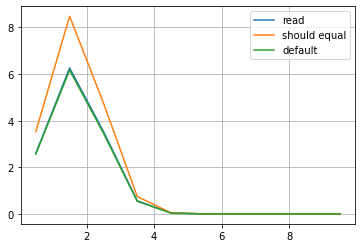

In [68]:
xs = read_intermediate['bin_centers'].values
plt.plot(xs, read_intermediate['counts'].values, label = 'read')
plt.plot(xs, compare_spec['counts'].values, label = 'should equal')
plt.plot(xs, compare_spec2['counts'].values, label = 'default')
# plt.plot(xs, compare_spec3['counts'].values, label = 'default-shm')
plt.legend()

In [69]:
args = dict(v_0=142.3* nu.km / nu.s, 
                v_esc = 503* nu.km / nu.s, 
                rho_dm = 0.21 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
compare_shm = dddm.SHM(**args)
compare_spec = get_det_spec('Xe_migd', mw = 1.14, sigma = 10.**-35.61
             , nbins = 10, background = False, shm = compare_shm)

In [70]:
args = dict(v_0=233* nu.km / nu.s, 
                v_esc = 528* nu.km / nu.s, 
                rho_dm = 0.55 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
compare_shm = dddm.SHM(**args)
compare_spec2 = get_det_spec('Xe_migd', mw = 1, sigma = 10.**-35
             , nbins = 10, background = False, shm = compare_shm)

In [71]:
args = dict(v_0=233* nu.km / nu.s, 
                v_esc = 528* nu.km / nu.s, 
                rho_dm = 0.21 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
compare_shm = dddm.SHM(**args)
compare_spec3 = get_det_spec('Xe_migd', mw = 1.14, sigma = 10.**-35.61
             , nbins = 10, background = False, shm = compare_shm)

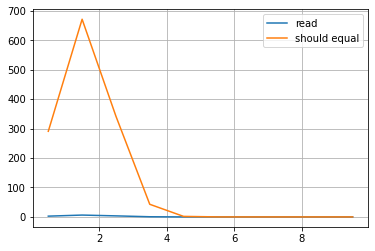

In [72]:
xs = read_intermediate['bin_centers'].values
plt.plot(xs, read_intermediate['counts'].values, label = 'read')
plt.plot(xs, compare_spec['counts'].values, label = 'should equal')
# plt.plot(xs, compare_spec2['counts'].values, label = 'default')
# plt.plot(xs, compare_spec3['counts'].values, label = 'default-shm')
plt.legend()

# Check likelihood function as function of v_0

In [83]:
from DirectDmTargets import SHM, log_likelihood, experiment, remove_nan
def plt_ll_sigma_mass_migd(spec_clas, vary, det='Xe_migdal', bins=10, m=1, sig=1e-40):
#     assert vary in ['mass', 'sig'], "use sig or mass"
    use_SHM = SHM(v_0=233* nu.km / nu.s, 
                  v_esc = 528* nu.km / nu.s, 
                  rho_dm = 0.55 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
    events = spec_clas(m, sig, use_SHM, experiment[det])
    events.n_bins = bins
    data = events.get_data(poisson=False)
    if vary == 'sig':
        plt.xlabel('$\sigma$ $[cm^2]$')
        plt.axvline(sig, alpha=0.5, color='red', label='truth')
#         var = np.linspace(0.1 * sig, 10 * sig, 30)
        var = np.concatenate((np.linspace(0.1 * sig, sig, 15),
                              np.linspace(sig, sig*3, 15)))

        def model(x):
            res = spec_clas(m, x, use_SHM, experiment[det])
            res.n_bins = bins
            return res.get_data(poisson=False)['counts']

    elif vary == 'mass':
        plt.xlabel('mass [GeV/$c^2$]')
        plt.axvline(m, alpha=0.5, color='red', label='truth')
        plt.axvline(m, alpha=0.1, color='black', label='binning boundary')
        var = np.concatenate((np.linspace(m/50, m, 15),
                              np.linspace(m, m*5, 15)))

        def model(x):
            res = spec_clas(x, sig, use_SHM, experiment[det])
            res.n_bins = bins
            return res.get_data(poisson=False)['counts']
    elif vary == 'v_0':
        plt.xlabel('v_0 [km/s]')
        plt.axvline(233, alpha=0.5, color='red', label='truth')
#         plt.axvline(233, alpha=0.1, color='black', label='binning boundary')
#         var = np.concatenate((np.linspace(1, 33, 50),
#                               np.linspace(33, 300, 50)))
        var = np.linspace(233 - 5 * 30, 233 + 10 * 30, 80)
        def model(x):
            use_SHM = SHM(
                  v_0=x* nu.km / nu.s, 
                  v_esc = 528* nu.km / nu.s, 
                  rho_dm = 0.55 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
            res = spec_clas(m, sig, use_SHM, experiment[det])
            res.n_bins = bins
            return res.get_data(poisson=False)['counts']
    plr = [log_likelihood(data['counts'], model(x)) for x in
           tqdm(var)]

    plt.xlim(var[0], var[-1])
    var, plr = remove_nan(var, plr), remove_nan(plr, var)
    plt.plot(var, plr, linestyle='steps-mid')
    plt.ylim(np.min(plr), np.max(plr))
    return var, plr


# def plt_ll_sigma_spec(det='Xe', bins=10, m=50, sig=1e-45):
#     plt_ll_sigma_mass(GenSpectrum, 'sig', det=det, bins=bins, m=m, sig=sig)


# def plt_ll_mass_spec(det='Xe', bins=10, m=50, sig=1e-45):
#     plt_ll_sigma_mass(GenSpectrum, 'mass', det=det, bins=bins, m=m, sig=sig)


def plt_ll_migd(det='Xe_migd', var = 'v_0' , bins=10, m=1, sig=1e-42):
    return plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, var, det=det, bins=bins, m=m, sig=sig)

100%|██████████| 80/80 [55:09<00:00, 41.37s/it]  
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


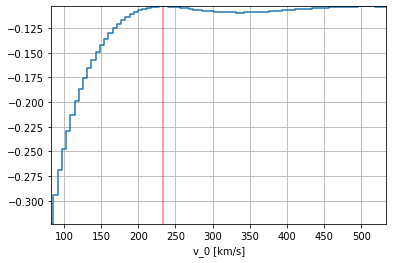

In [84]:
res = plt_ll_migd()

100%|██████████| 30/30 [08:46<00:00, 17.57s/it]
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


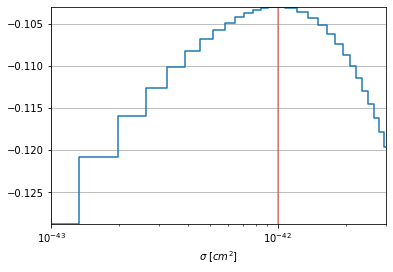

In [75]:
res2 = plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, 'sig', det='Xe_migd', bins=10, m=1, sig=1e-42)
plt.xscale("log")

100%|██████████| 30/30 [09:33<00:00, 19.11s/it]
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


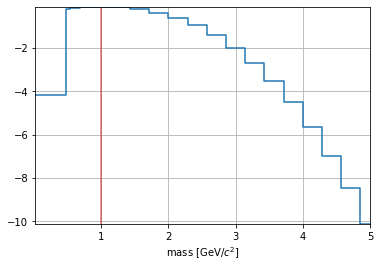

In [76]:
res3 = plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, 'mass', det='Xe_migd', bins=10, m=1, sig=1e-42)
# plt.xscale("log")

100%|██████████| 50/50 [00:05<00:00,  9.86it/s]
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


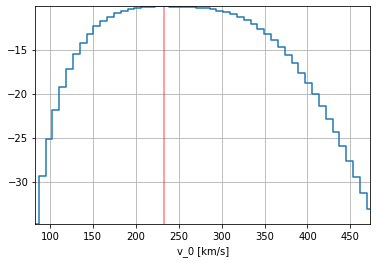

In [77]:
res4 = plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, 'v_0', det='Xe', bins=10, m=50, sig=1e-46)

100%|██████████| 50/50 [00:04<00:00, 11.34it/s]
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


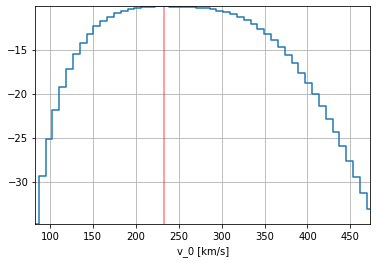

In [78]:
res4 = plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, 'v_0', det='Xe', bins=10, m=50, sig=1e-46)

100%|██████████| 50/50 [00:04<00:00, 11.22it/s]
/home/joran/miniconda3/envs/dddm3/lib/python3.7/site-packages/ipykernel-5.1.4-py3.7.egg/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


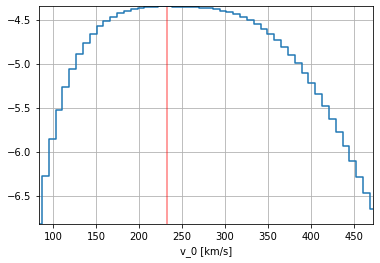

In [79]:
res5 = plt_ll_sigma_mass_migd(dddm.DetectorSpectrum, 'v_0', det='Xe', bins=10, m=50, sig=1e-47)

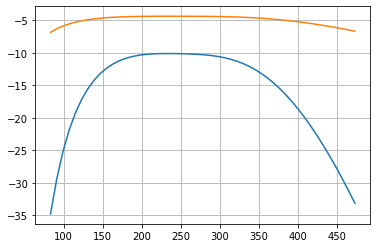

In [80]:
plt.plot(res4[0],res4[1])
plt.plot(res5[0],res5[1])

# Plot spectra of benchmarks

In [81]:
args = dict(v_0=233* nu.km / nu.s, 
                v_esc = 528* nu.km / nu.s, 
                rho_dm = 0.55 * nu.GeV / nu.c0 ** 2 / nu.cm ** 3)
use_SHM = dddm.SHM(**args)

0.10159144624745449
1.0159144624745449
10.159144624745448
10159.144123005937


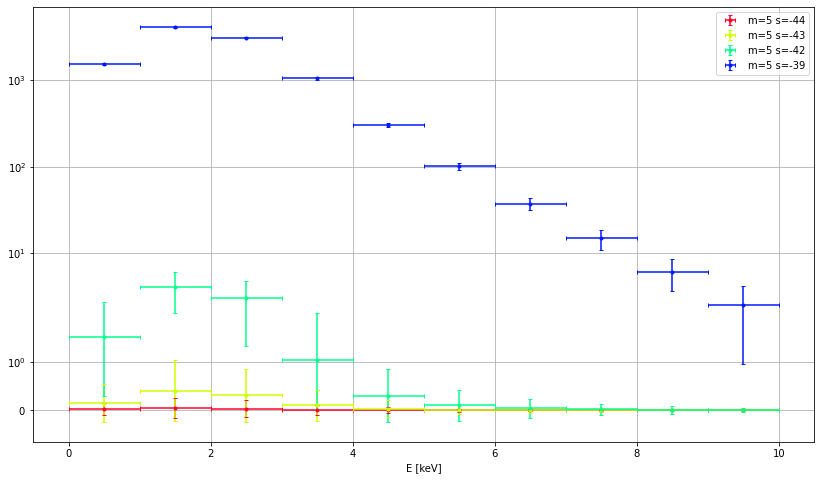

Took 66.29594659805298 s
0.018387616705552765
0.18387616705552767
1.8387616705552763
1838.7616705552769


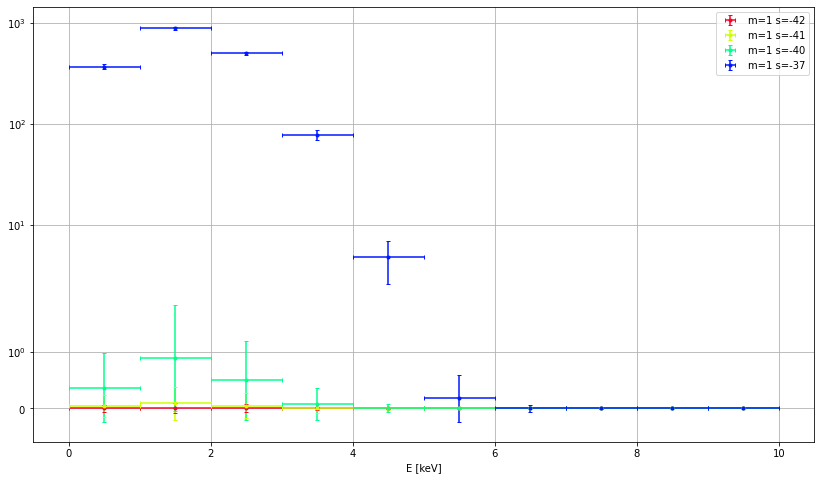

Took 75.99849581718445 s
0.008694459191626602
0.08694459191626601
0.8694459191626603
869.44591916266


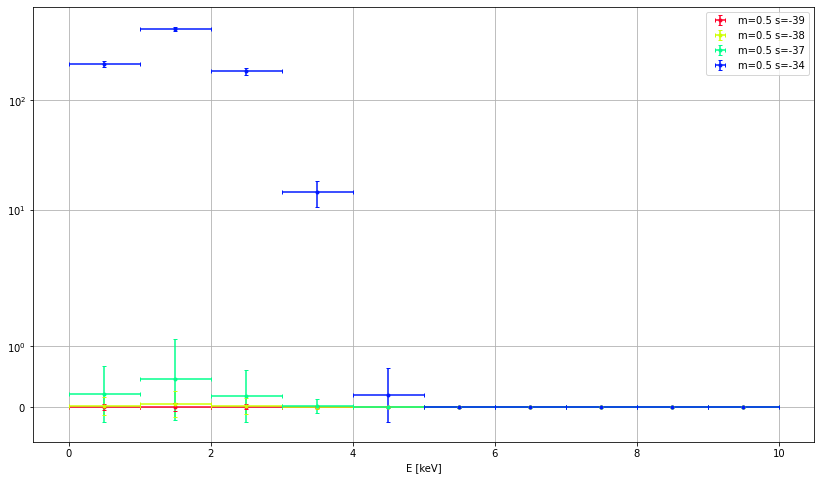

Took 70.50374794006348 s
0.0
0.0
0.0


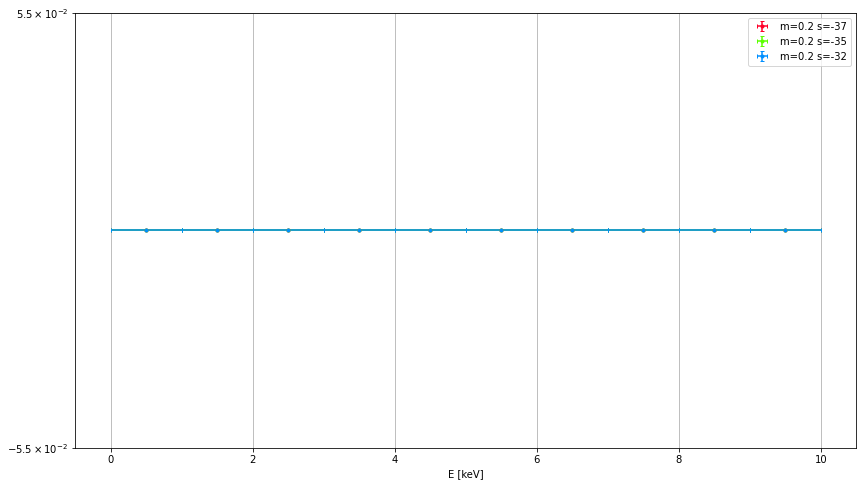

Took 48.73655986785889 s


In [82]:
for m in [5,1,0.5,0.2]:
    if m == 5: sigmas = [-44,-43,-42, -39]
    if m == 1: sigmas = [-42,-41,-40, -37]
    if m == 0.5: sigmas = [-39, -38, -37, -34]
    if m == 0.2: sigmas = [-37,-35, -32]
    start = time.time()
    fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
    for i, s in enumerate(sigmas):        
        lab =  f"m={m} s={s}"        
        spectra_for_shm(ax1, 'Xe_migd', use_SHM, 
                        label = lab, mw=m, 
                        sigma = 10**s, c = cm(float(i)/len(sigmas)))
    plt.legend()
    plt.yscale("symlog")
    plt.show()
    print(f'Took {time.time()-start} s')

0.10159144624745449
1.0159144624745449
10.159144624745448


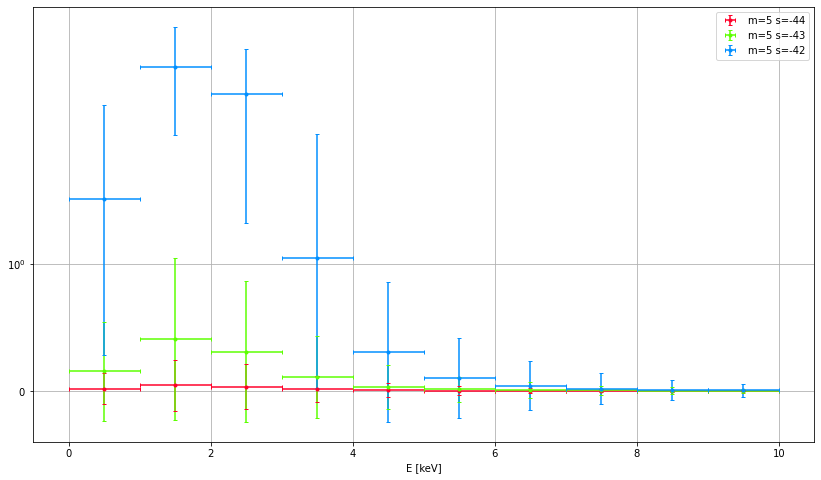

Took 49.30160140991211 s
0.018387616705552765
0.18387616705552767
1.8387616705552763
18.387616705552755


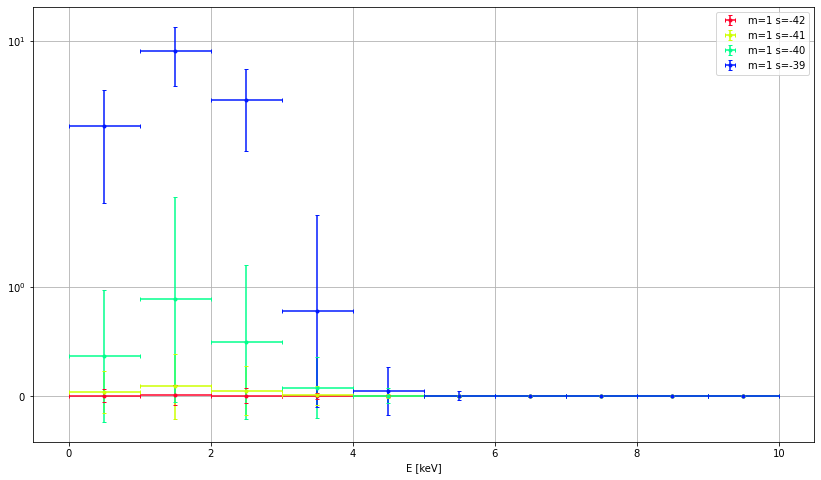

Took 71.66794061660767 s
0.008694459191626602
0.08694459191626601
0.8694459191626603
8.694459191626603


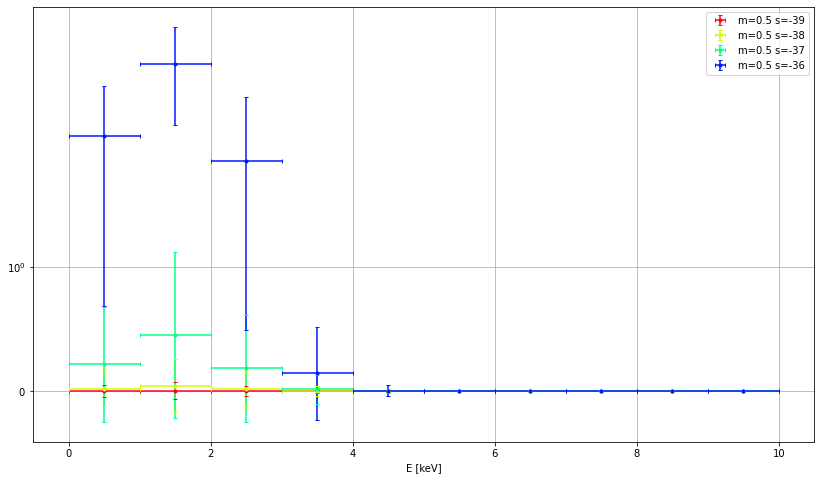

Took 66.52983498573303 s
0.0
0.0
0.0
0.0
0.0


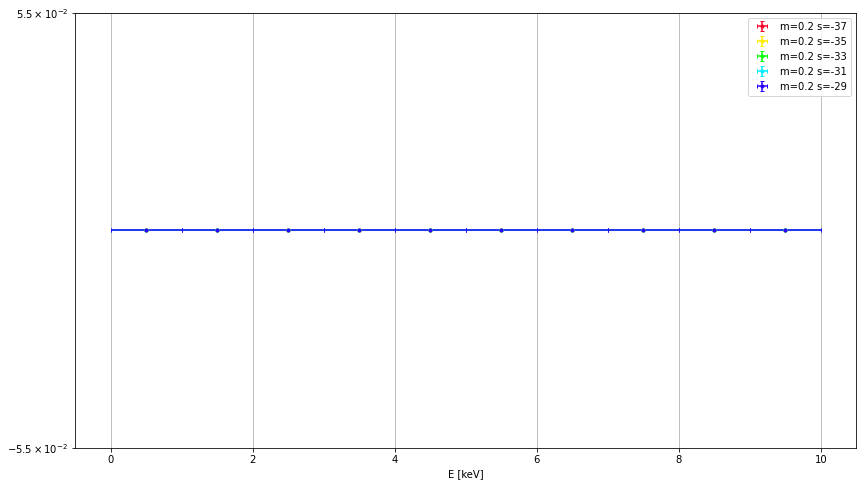

Took 78.72665452957153 s


In [39]:
for m in [5,1,0.5,0.2]:
    if m == 5: sigmas = [-44,-43,-42]
    if m == 1: sigmas = [-42,-41,-40,-39]
    if m == 0.5: sigmas = [-39, -38, -37, -36]
    if m == 0.2: sigmas = [-37, -35, -33, -31, -29]
    start = time.time()
    fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
    for i, s in enumerate(sigmas):        
        lab =  f"m={m} s={s}"        
        spectra_for_shm(ax1, 'Xe_migd', use_SHM, 
                        label = lab, mw=m, sigma = 10**s, c = cm(float(i)/len(sigmas)))
    plt.legend()
    plt.yscale("symlog")
    plt.show()
    print(f'Took {time.time()-start} s')

0.10159144624745449
1.0159144624745449
10.159144624745448


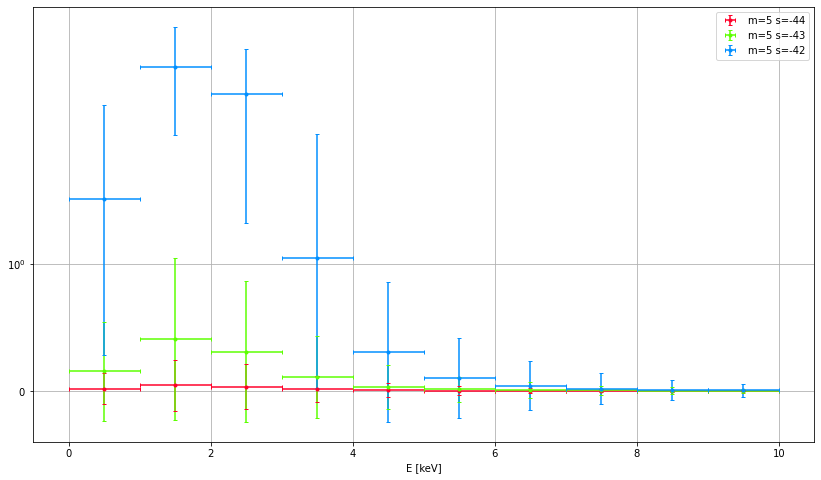

Took 49.14734148979187 s
0.018387616705552765
0.18387616705552767
1.8387616705552763
18.387616705552755


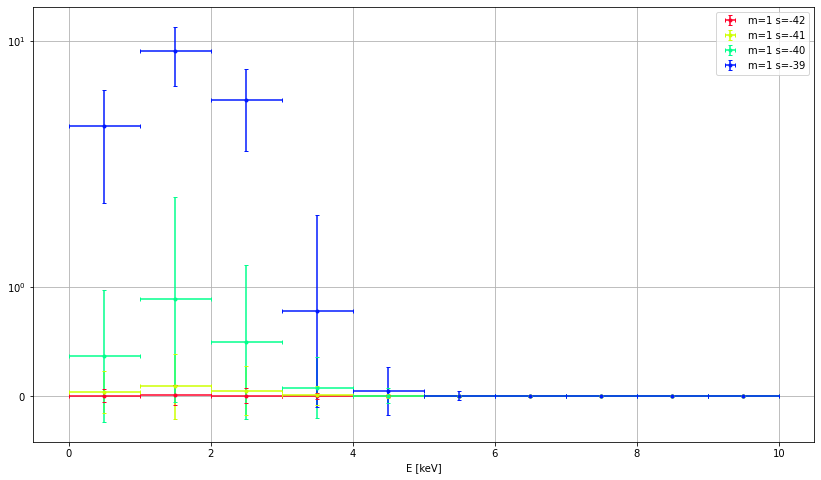

Took 73.66975426673889 s
0.008694459191626602
0.08694459191626601
0.8694459191626603
8.694459191626603


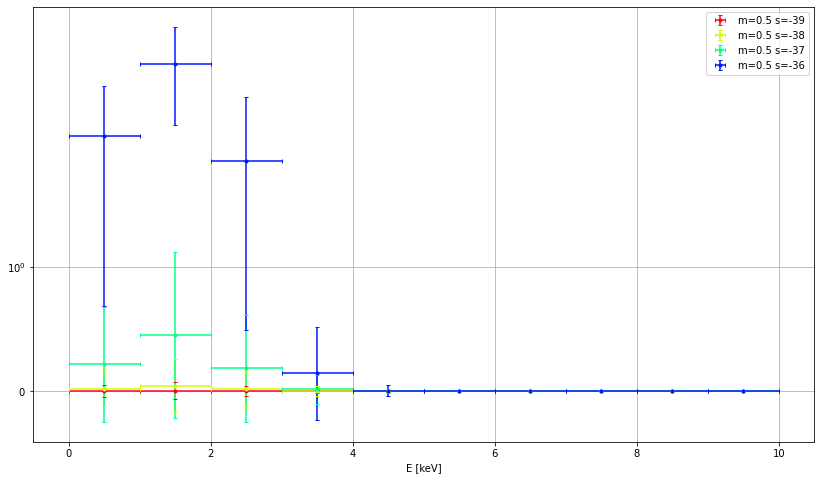

Took 67.13431811332703 s
0.0
0.0
0.0
0.0
0.0


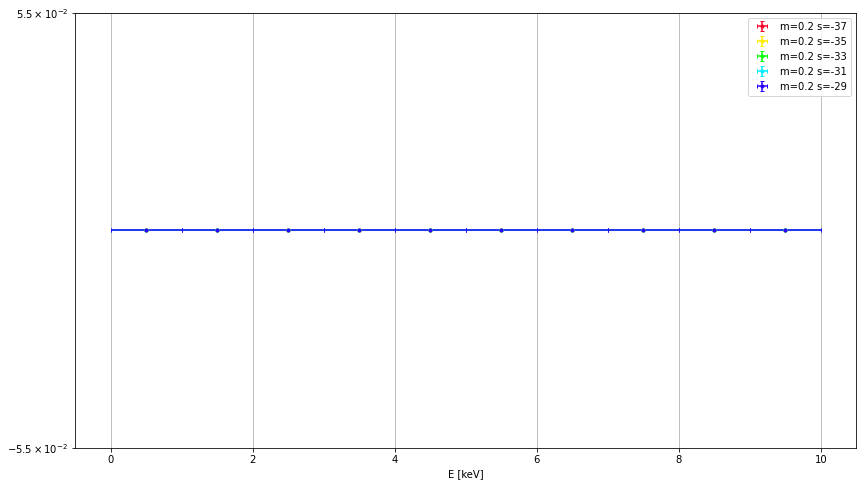

Took 78.67508387565613 s
0.0
0.0
0.0
0.0
0.0


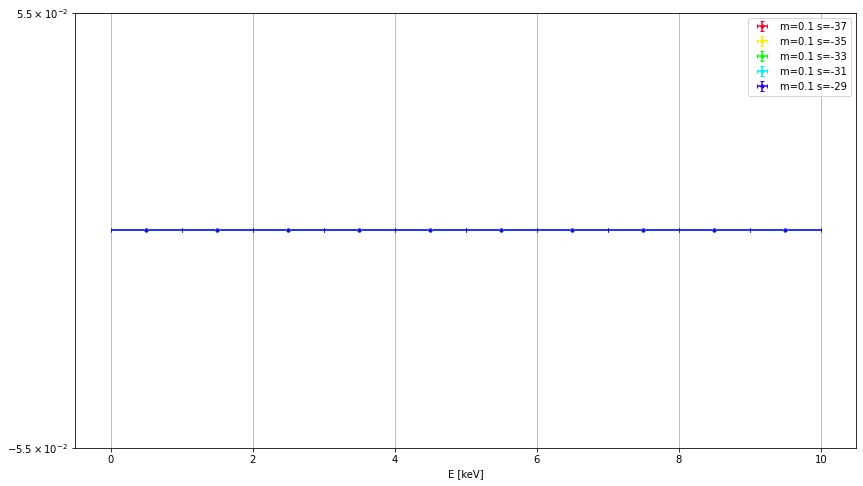

Took 80.96473693847656 s
0.0
0.0
0.0
0.0
0.0


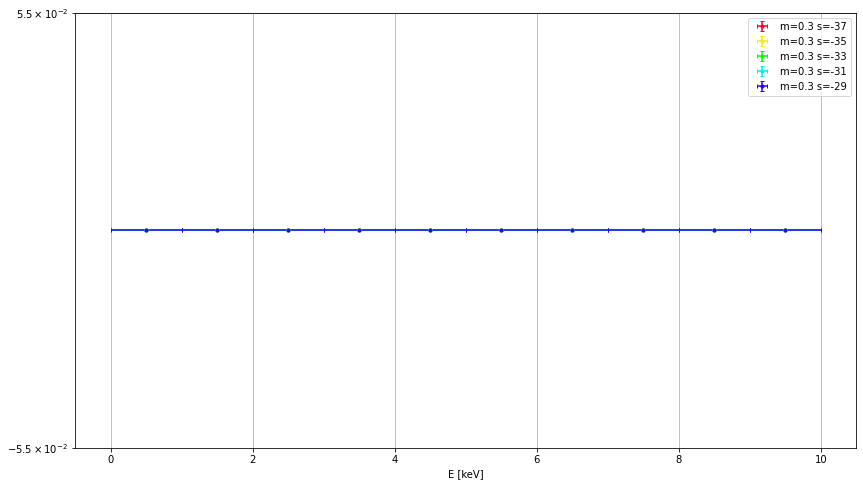

Took 82.84499549865723 s
0.0
0.0
0.0
0.0
0.0


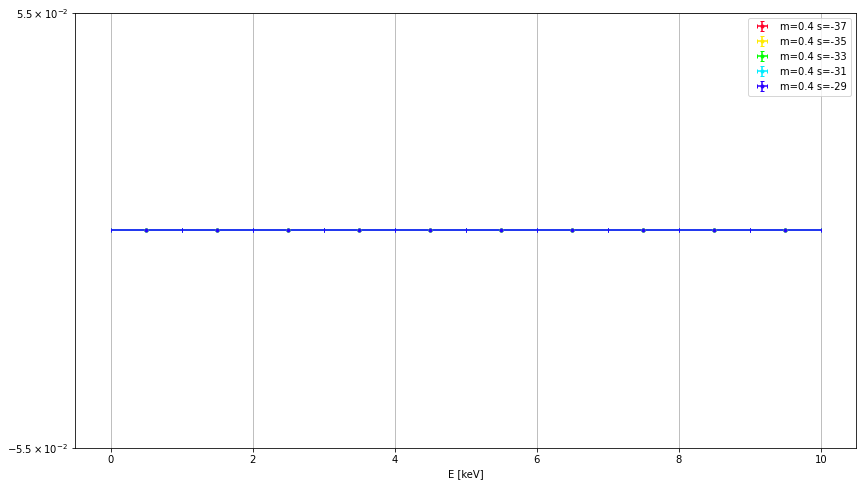

Took 84.40403056144714 s
0.0
0.0
0.0
0.0
0.0


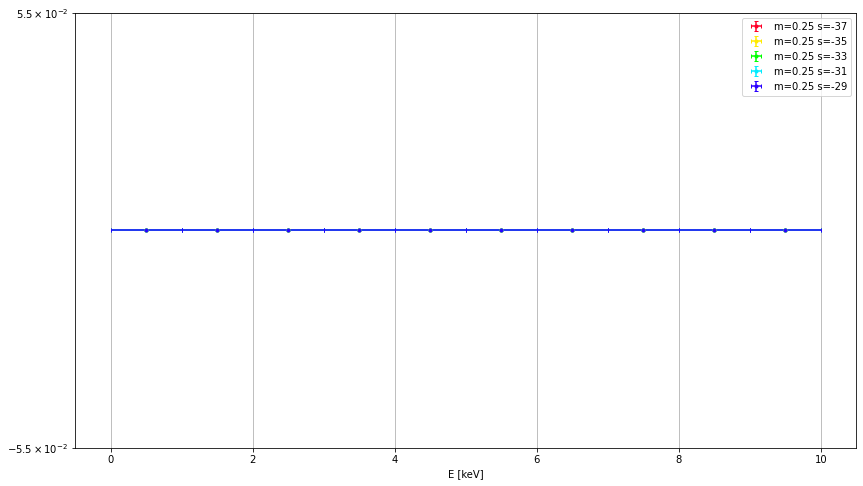

Took 82.12551856040955 s


In [41]:
for m in [5,1,0.5,0.2, 0.1, 0.3, 0.4, 0.25]:
    if m == 5: sigmas = [-44,-43,-42]
    if m == 1: sigmas = [-42,-41,-40,-39]
    if m == 0.5: sigmas = [-39, -38, -37, -36]
    if m == 0.2: sigmas = [-37, -35, -33, -31, -29]
    if m < 0.5: 
        sigmas = [-37, -35, -33, -31, -29]
    start = time.time()
    fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
    for i, s in enumerate(sigmas):        
        lab =  f"m={m} s={s}"        
        spectra_for_shm(ax1, 'Xe_migd', use_SHM, 
                        label = lab, mw=m, sigma = 10**s, c = cm(float(i)/len(sigmas)))
    plt.legend()
    plt.yscale("symlog")
    plt.show()
    print(f'Took {time.time()-start} s')

0.10179579354986856
1.0179579354986859
10.17957935498686


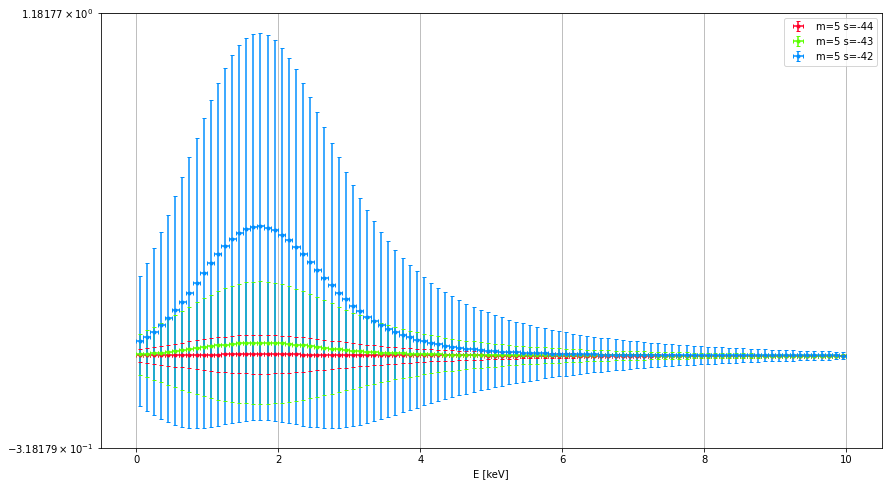

Took 388.95077562332153 s
0.018529518321394885
0.18529518321394886
1.8529518321394889
18.52951832139488


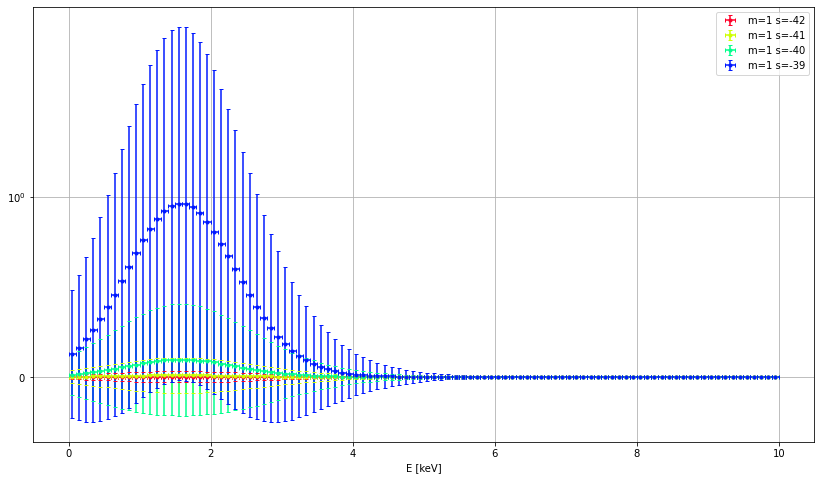

Took 695.1254305839539 s
0.010003234484009173
0.10003234484009171
1.0003234484009174
10.003234484009171


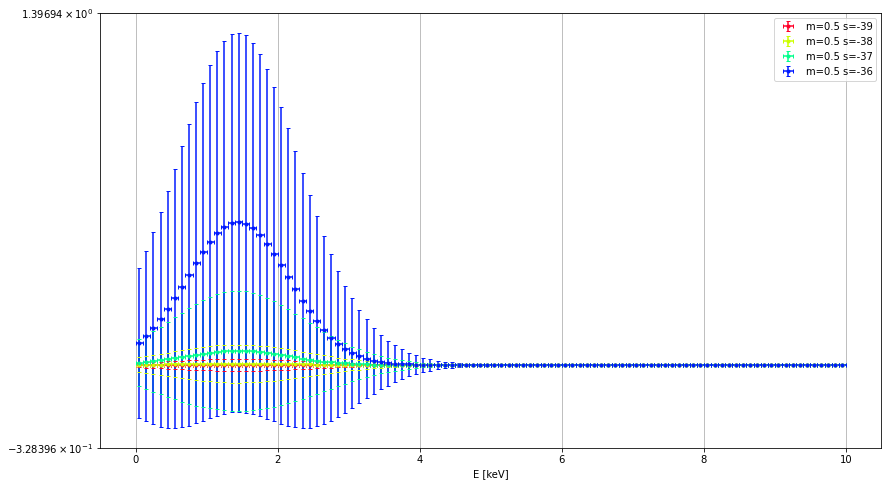

Took 654.6944060325623 s
0.0
0.0
0.0
0.0
0.0


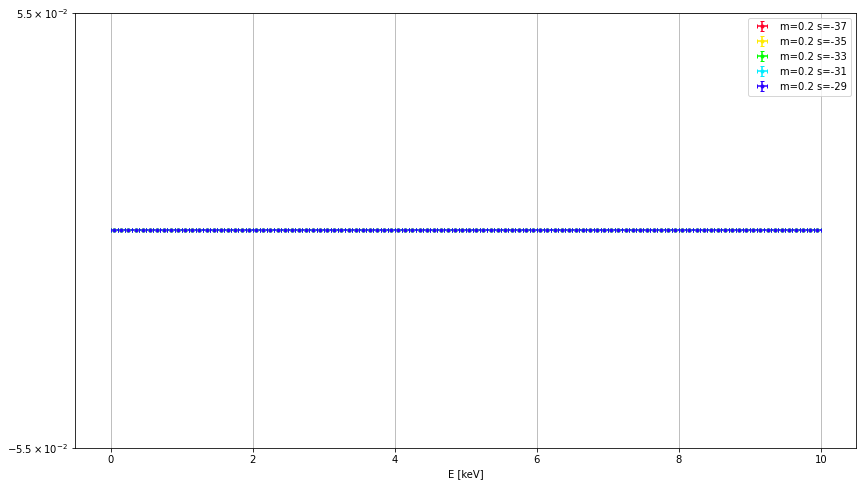

Took 797.1853537559509 s


In [43]:
for m in [5,1,0.5,0.2]:
    if m == 5: sigmas = [-44,-43,-42]
    if m == 1: sigmas = [-42,-41,-40,-39]
    if m == 0.5: sigmas = [-39, -38, -37, -36]
    if m == 0.2: sigmas = [-37, -35, -33, -31, -29]
    start = time.time()
    fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
    for i, s in enumerate(sigmas):        
        lab =  f"m={m} s={s}"        
        spectra_for_shm(ax1, 'Xe_migd', use_SHM, 
                        label = lab, mw=m, sigma = 10**s, c = cm(float(i)/len(sigmas)),
                       nbins = 100)
    plt.legend()
    plt.yscale("symlog")
    plt.show()
    print(f'Took {time.time()-start} s')

0.010003234484009173
0.10003234484009171
1.0003234484009174
10.003234484009171


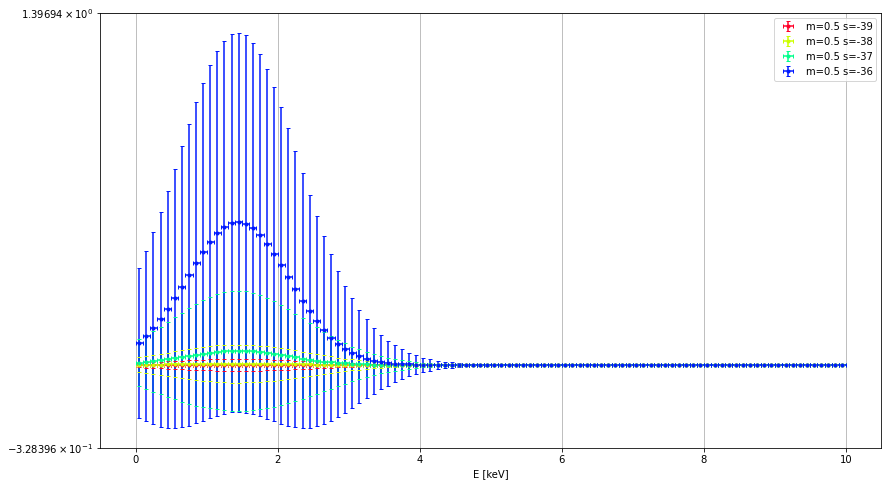

Took 1259.261641740799 s
0.0
0.0
0.0
0.0
0.0
0.0
0.0


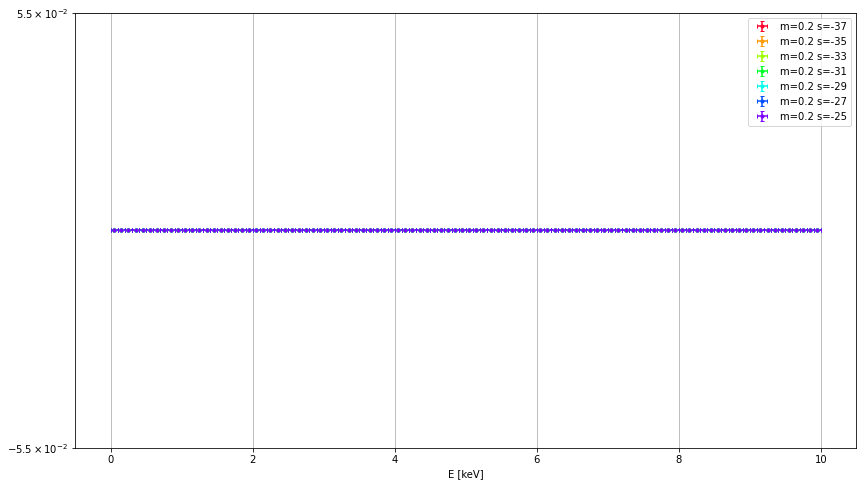

Took 2109.712775707245 s
0.0
0.0
0.0
0.0
0.0
0.0
0.0


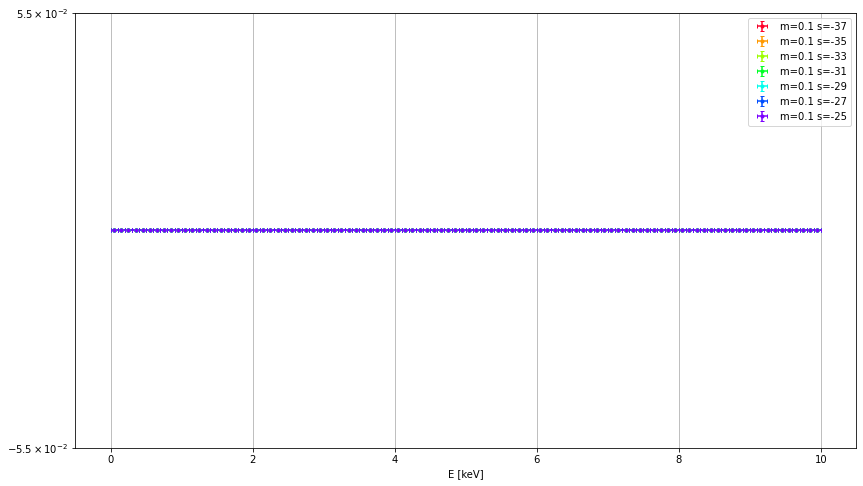

Took 2097.296021461487 s
0.0
0.0
0.0
0.0
0.0
0.0
0.0


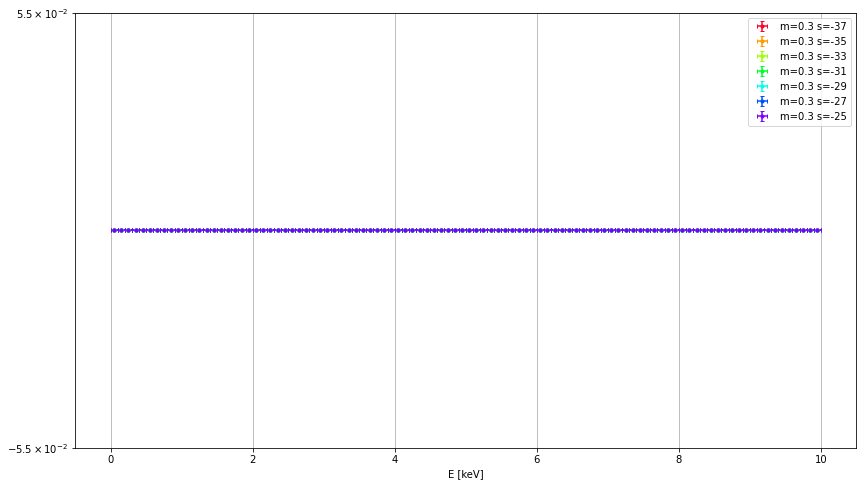

Took 2099.2563264369965 s
0.0
0.0
0.0
0.0
0.0
0.0
0.0


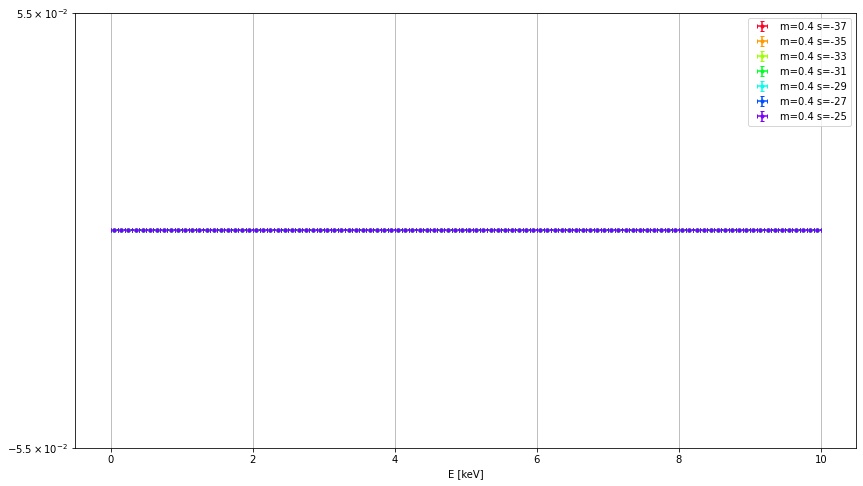

Took 2167.266481399536 s
0.0
0.0
0.0
0.0
0.0
0.0
0.0


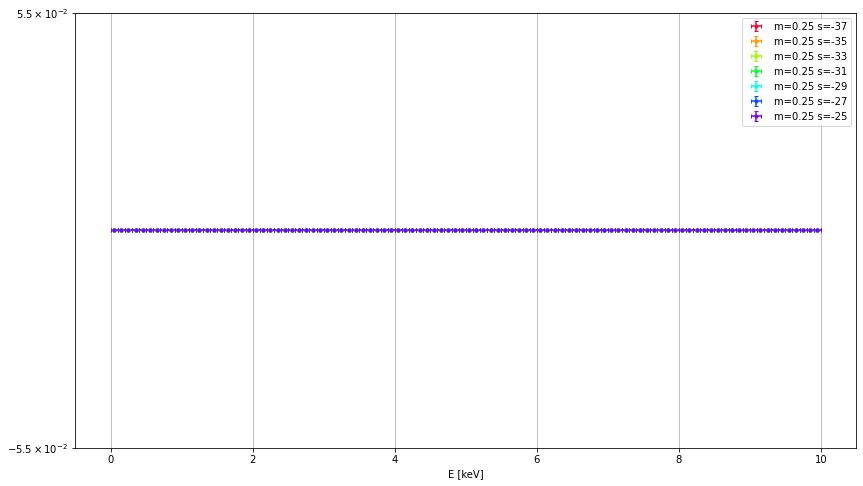

Took 2131.598172903061 s


In [85]:
for m in [0.5,0.2, 0.1, 0.3, 0.4, 0.25]:
    if m == 5: sigmas = [-44,-43,-42]
    if m == 1: sigmas = [-42,-41,-40,-39]
    if m == 0.5: sigmas = [-39, -38, -37, -36]
    if m == 0.2: sigmas = [-37, -35, -33, -31, -29]
    if m < 0.5: 
        sigmas = [-37, -35, -33, -31, -29,-27,-25]
    start = time.time()
    fig, (ax1) = plt.subplots(1, figsize = (14,8), sharex = True)
    for i, s in enumerate(sigmas):        
        lab =  f"m={m} s={s}"        
        spectra_for_shm(ax1, 'Xe_migd', use_SHM, 
                        label = lab, mw=m, sigma = 10**s, c = cm(float(i)/len(sigmas)),
                       nbins = 100)
    plt.legend()
    plt.yscale("symlog")
    plt.show()
    print(f'Took {time.time()-start} s')